# IRIS DATASET


## Required libraries

In [196]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [51]:
raw_data=pd.read_csv('IRIS.csv')
print(raw_data)
print(raw_data.columns)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [53]:
print(pd.unique(raw_data['Species']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [126]:
data=raw_data.copy()
data=data.drop(['Id'],axis=1)
data['Species']=data['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## Decleare the dependent and independet variable

In [127]:
targets=data['Species']
inputs=data.drop(['Species'],axis=1)

## Scale the data

In [128]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

inputs_scaled= scaler.transform(inputs)

## train-test split

In [129]:
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled,targets,test_size=0.2, random_state=365)

## Create the Regression

## Seperate the target and independent variable

## Create the object of the model

In [153]:
model=LogisticRegression()
model.fit(x_train,y_train)

predict=model.predict(x_test)


## accuracy of model

In [154]:
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data [1 1 1 1 1 1 3 2 3 2 2 2 2 1 2 3 3 3 1 2 2 3 2 3 3 3 3 1 2 2]


In [157]:
predict.shape
y_test.shape

(30,)

In [186]:
score = model.score(x_test, y_test)
print(score)

1.0


## Confution Matrics

In [167]:
from sklearn import metrics

In [169]:
cm=metrics.confusion_matrix(y_test,predict)
print(cm)

[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]


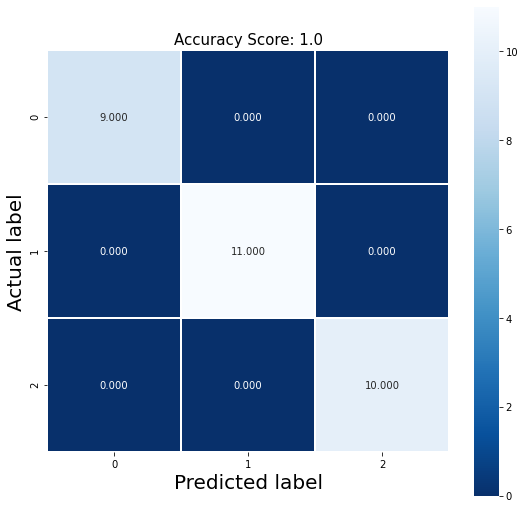

In [194]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5,square=True, cmap='Blues_r')
plt.ylabel('Actual label', size=20)
plt.xlabel('Predicted label', size=20)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

plt.show()
